# Data Exploring

---

## Import Libraries

In [87]:
import numpy as np
import geopandas as gpd
from pathlib import Path
import matplotlib.pyplot as plt
import geopy
from geopy.geocoders import Nominatim
from pyproj import Transformer
import shapefile
import rasterio
import rasterio.features
import rasterio.warp
import rasterio.mask
from rasterio.plot import show
from rasterio.windows import Window
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import plotly
import plotly.graph_objects as go

import fiona

---

## PyShp

- NULL = 0
- POINT = 1
- POLYLINE = 3
- POLYGON = 5
- MULTIPOINT = 8
- POINTZ = 11
- POLYLINEZ = 13
- POLYGONZ = 15
- MULTIPOINTZ = 18
- POINTM = 21
- POLYLINEM = 23
- POLYGONM = 25
- MULTIPOINTM = 28
- MULTIPATCH = 31

In [6]:
sf = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01")

In [7]:
sf2 = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k02/DHMVII_vdc_k02/DHMVII_vdc_k02")

In [8]:
sf3 = shapefile.Reader("./Data/DHMVIIDSMRAS1m_k03/DHMVII_vdc_k03/DHMVII_vdc_k03")

In [9]:
len(sf)

3

In [10]:
len(sf2)

7

In [11]:
len(sf3)

5

In [12]:
print(sf)

shapefile Reader
    3 shapes (type 'POLYGONZ')
    3 records (4 fields)


In [9]:
print(sf2)

shapefile Reader
    7 shapes (type 'POLYGON')
    7 records (4 fields)


In [10]:
print(sf3)

shapefile Reader
    5 shapes (type 'POLYGONZ')
    5 records (4 fields)


In [11]:
# the lower left (x,y) coordinate and upper right corner

sf.bbox

[144900.0, 237758.6700000018, 162100.0300195366, 247224.38999511302]

In [12]:
type(sf.bbox)

shapefile._Array

In [13]:
sf2.bbox

[162000.0001220703, 238000.0001220703, 194000.0001220703, 250000.0001220703]

In [14]:
sf3.bbox

[193999.9999999993, 238000.00000000477, 206000.00000000017, 248000.00000000015]

In [15]:
xmin = sf.bbox[0]
ymin = sf.bbox[1]
xmax = sf.bbox[2]
ymax = sf.bbox[3]

In [53]:
shapes = sf.shape()

In [17]:
type(shapes)

shapefile.Shape

In [18]:
shapes2 = sf2.shape()

In [19]:
shapes3 = sf3.shape()

In [20]:
# The shape's index position in the original shapefile

shapes.oid

0

In [21]:
shapes3.shapeType

15

In [22]:
shapes2.shapeType

5

In [23]:
shapes.shapeType

15

In [24]:
# If the shape record has multiple parts this attribute contains the index of the first point of each part.
# If there is only one part then a list containing 0 is returned

shapes.parts

[0, 3344]

In [25]:
shapes2.parts

[0, 1288, 1609]

In [26]:
shapes3.parts

[0]

In [27]:
# contains a list of tuples containing an (x,y) coordinate for each point in the shape

max(shapes.points)

(162100.0300195366, 246282.12998290733)

In [28]:
min(shapes2.points)

(162000.0001220703, 245951.89288330078)

In [29]:
len(shapes.points)

6268

In [30]:
len(shapes2.points)

1886

In [31]:
len(shapes3.points)

353

In [32]:
fields = sf.fields

In [33]:
fields2 = sf2.fields

In [34]:
fields3 = sf3.fields

In [35]:
fields

[('DeletionFlag', 'C', 1, 0),
 ['Id', 'N', 6, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [36]:
fields2

[('DeletionFlag', 'C', 1, 0),
 ['Date', 'C', 254, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [37]:
fields3

[('DeletionFlag', 'C', 1, 0),
 ['Date', 'C', 254, 0],
 ['OpnDatum1', 'D', 8, 0],
 ['OpnDatum2', 'D', 8, 0]]

In [38]:
records = sf.records()

In [39]:
records2 = sf2.records()

In [40]:
records3 = sf3.records()

In [41]:
len(records)

3

In [42]:
records

[Record #0: [0, datetime.date(2013, 2, 20), None],
 Record #1: [0, datetime.date(2013, 4, 1), None],
 Record #2: [0, datetime.date(2013, 2, 20), datetime.date(2013, 4, 1)]]

In [43]:
records2

[Record #0: ['20140129', datetime.date(2014, 1, 29), None],
 Record #1: ['20140130', datetime.date(2014, 1, 29), datetime.date(2014, 1, 30)],
 Record #2: ['20140130', datetime.date(2014, 1, 30), None],
 Record #3: ['20140131', datetime.date(2014, 1, 30), datetime.date(2014, 1, 31)],
 Record #4: ['20140131', datetime.date(2014, 1, 31), None],
 Record #5: ['20140202', datetime.date(2014, 1, 31), datetime.date(2014, 2, 2)],
 Record #6: ['20140202', datetime.date(2014, 2, 2), None]]

In [44]:
records3

[Record #0: ['20141121', datetime.date(2014, 11, 21), None],
 Record #1: ['20141124', datetime.date(2014, 11, 24), None],
 Record #2: ['20141125', datetime.date(2014, 11, 25), None],
 Record #3: ['20141121', datetime.date(2014, 11, 21), datetime.date(2014, 11, 24)],
 Record #4: ['20141125', datetime.date(2014, 11, 24), datetime.date(2015, 11, 25)]]

In [45]:
shapeRecs = sf.shapeRecords()

In [46]:
shapeRecs2 = sf2.shapeRecords()

In [47]:
print(shapeRecs)

ShapeRecords: [<shapefile.ShapeRecord object at 0x7fb1a04a1250>, <shapefile.ShapeRecord object at 0x7fb1a383ad00>, <shapefile.ShapeRecord object at 0x7fb1a0546d00>]


---

## Rasterio

In [13]:
dataset = rasterio.open("./Data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif")

In [14]:
type(dataset)

rasterio.io.DatasetReader

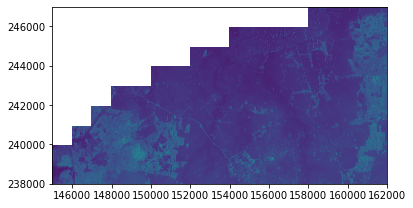

<AxesSubplot:>

In [15]:
show(dataset)

In [5]:
dataset2 = rasterio.open("./Data/DHMVIIDSMRAS1m_k02/GeoTIFF/DHMVIIDSMRAS1m_k02.tif")

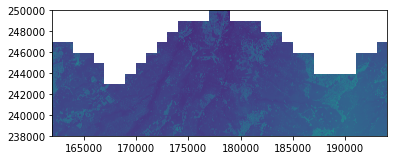

<AxesSubplot:>

In [6]:
show(dataset2)

In [7]:
dataset.name

'./Data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'

In [8]:
dataset2.name

'./Data/DHMVIIDSMRAS1m_k02/GeoTIFF/DHMVIIDSMRAS1m_k02.tif'

In [9]:
# Dataset objects have bands and this one has a band count of 1

dataset.count

1

In [10]:
dataset2.count

1

In [11]:
# A dataset band is an array of values
# All band arrays of a dataset have the same number of rows and columns
# width = columns

dataset.width

17000

In [12]:
dataset2.width

32000

In [13]:
# height = rows

dataset.height

9000

In [14]:
dataset2.height

12000

In [15]:
# Apply a dictionary comprehension to the zip() product of a dataset’s indexes and dtypes attributes
# to get a mapping of band indexes to variable data types

{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'float32'}

In [16]:
dataset.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [17]:
dataset2.bounds

BoundingBox(left=162000.0, bottom=238000.0, right=194000.0, top=250000.0)

In [18]:
meters_wide = dataset.bounds[2] - dataset.bounds[0]
meters_high = dataset.bounds[3] - dataset.bounds[1]

In [19]:
print(f"{meters_wide} meters wide")
print(f"{meters_high} meters high")

17000.0 meters wide
9000.0 meters high


In [20]:
dataset.transform  # * (0, 0)

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [21]:
# These coordinate values are relative to the origin of the dataset’s Coordinate Reference System (CRS)

dataset.crs

CRS.from_epsg(31370)

#### **EPSG 31370** refers to *Belgian Lambert 72 -- Belgium*

#### Ref. URL: https://epsg.io/31370

In [22]:
dataset.indexes

(1,)

In [23]:
dataset.read()

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [24]:
band1 = dataset.read(1)

In [25]:
band2 = dataset2.read(1)

In [26]:
type(band1)

numpy.ndarray

In [27]:
band1.shape

(9000, 17000)

In [28]:
band1

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

In [29]:
band1[5000]

array([-9999.  , -9999.  , -9999.  , ...,    34.77,    26.91,    34.86],
      dtype=float32)

In [30]:
dataset.bounds.left

145000.0

To get the value for the pixel 10 kilometers east and 5 kilometers south of the dataset’s upper left corner, do the following:

In [31]:
x, y = (dataset.bounds.left + 10000, dataset.bounds.top - 5000)

In [32]:
row, col = dataset.index(x, y)

In [33]:
row, col

(5000, 10000)

In [34]:
band1[row, col]

25.95

In [35]:
# To get the spatial coordinates of a pixel, use the dataset’s xy() method.
# Ex.: the coordinates of the center of the image can be computed like this:

dataset.xy(dataset.height // 2, dataset.width // 2)

(153500.5, 242499.5)

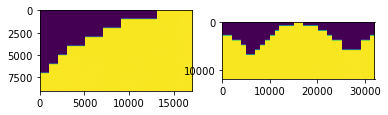

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(band1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(band2)

In [37]:
dataset.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 17000,
 'height': 9000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 145000.0,
        0.0, -1.0, 247000.0)}

In [38]:
dataset2.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 32000,
 'height': 12000,
 'count': 1,
 'crs': CRS.from_epsg(31370),
 'transform': Affine(1.0, 0.0, 162000.0,
        0.0, -1.0, 250000.0)}

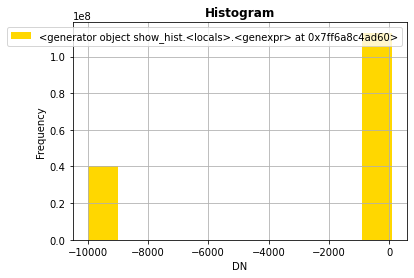

In [39]:
rasterio.plot.show_hist(band1, bins=10)

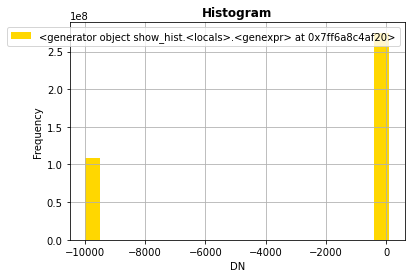

In [40]:
rasterio.plot.show_hist(band2, bins=20)

---

## GeoPy

In [19]:
geopy.geocoders.ArcGIS()

In [20]:
geolocator = Nominatim(user_agent="ArcGIS")
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)

Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York, 10010, United States


In [21]:
print((location.latitude, location.longitude))

(40.741059199999995, -73.98964162240998)


In [22]:
location = geolocator.geocode("Place Saint-Lambert 17, 1020 Bruxelles")

In [24]:
print(location.address)

17, Place Saint-Lambert - Sint-Lambertusplein, Heysel - Heizel, Laeken - Laken, Ville de Bruxelles - Stad Brussel, Brussel-Hoofdstad - Bruxelles-Capitale, Région de Bruxelles-Capitale - Brussels Hoofdstedelijk Gewest, 1020, België / Belgique / Belgien


In [23]:
print(location.latitude, location.longitude)

50.890366 4.343493783022129


---

## ArcGIS

In [2]:
print("ArcGIS Online as anonymous user")
gis = GIS()
print("Logged in as anonymous user to " + gis.properties.portalName)

ArcGIS Online as anonymous user
Logged in as anonymous user to ArcGIS Online


---

## Convert the address into coordinates

In [19]:
def address_to_crs() -> int:
    geopy.geocoders.ArcGIS()
    geolocator = Nominatim(user_agent="ArcGIS")
    address = input("Insert your address here: ")
    location = geolocator.geocode(f"{address}")
    latitude = location.latitude
    longitude = location.longitude
    transformer = Transformer.from_crs("EPSG:4326", crs_to = "EPSG:31370", always_xy = False)
    x, y = transformer.transform(latitude, longitude)
    
    return int(x), int(y)

In [34]:
address_to_crs()

Insert your address here: Place de Brouckere, Bruxelles


(148900, 171236)

## Find the right tiff and plot the 3D area

In [1]:
def tiff_finder(x, y):
    paths = Path("./Data").glob("**/*.tif")
    loc = np.zeros((200, 200))
    for path in paths:
        with rasterio.open(path) as fd:
            if fd.bounds.left <= x <= fd.bounds.right:
                if fd.bounds.bottom <= y <= fd.bounds.top:
                    print(f"File source is {path}")
                    radius = 100
                    left, bottom, right, top = (
                        x - radius,
                        y - radius,
                        x + radius,
                        y + radius,
                    )
                    crop = fd.read(
                        1,
                        window=rasterio.windows.from_bounds(
                            left, bottom, right, top, fd.transform
                        ),
                    )
                    loc += crop
    fig = go.Figure(data=[go.Surface(z=loc)])
    fig['layout']['xaxis']['autorange'] = "reversed"
    fig.show()

In [35]:
tiff_finder(148900, 171236)

File source is Data/DHMVIIDSMRAS1m_k31/GeoTIFF/DHMVIIDSMRAS1m_k31.tif
File source is Data/DHMVIIDTMRAS1m_k31/GeoTIFF/DHMVIIDTMRAS1m_k31.tif


## Clip the house

In [ ]:
# 

points= ([pt for pt  in fiona.open("points.shp")])
for i, pt in enumerate(points):
    point = shape(pt['geometry'])
    if point.within(shape(multi['geometry'])):
         print i, shape(points[i]['geometry'])

In [95]:
def test_features(feat, x, y): 
    for f in feat["geometry"]: 
        if f.contains(x) and f.contains(y): 
            return True

In [89]:
def clip_house(shape_path, tif_path):
    x, y = address_to_crs()
    with fiona.open(shape_path, "r") as shapefile:
        if shapefile.bounds[0] <= x <= shapefile.bounds[2]:
            if shapefile.bounds[1] <= y <= shapefile.bounds[3]:
                for feature in shapefile: 
                    #print(type(shapefile))
                    #print(type(feature))
                    
                    if test_features(feature, x, y): 
                        with rasterio.open(tif_path, "r") as src: 
                            out_image, out_transform = rasterio.mask.mask(src, shape, crop=True)
                            out_meta = src.meta
                            out_meta.update(
                                {
                                    "driver": "GTiff",
                                    "height": out_image.shape[1],
                                    "width": out_image.shape[2],
                                    "transform": out_transform,
                                }
                            )
#    fig = go.Figure(data=[go.Surface(z=out_image)])
#    fig.show()

In [96]:
clip_house(
    "Data/DHMVIIDSMRAS1m_k31/DHMVII_vdc_k31/DHMVII_vdc_k31.shp",
    "Data/DHMVIIDSMRAS1m_k31/GeoTIFF/DHMVIIDSMRAS1m_k31.tif",
)

Insert your address here: Place Saint-Lambert 17, 1020 Bruxelles


AttributeError: 'str' object has no attribute 'contains'

In [22]:
import rioxarray

In [38]:
def clip_house(path, window:int):
    n = window
    x, y = address_to_crs()
    
    xds = rioxarray.open_rasterio(path, masked=True)
    coor1, coor2 = [(x - n), (y + n), (x + n), (y + n)]
    coor3, coor4 = [(x + n), (y - n), (x - n), (y - n)]
    geometries = [{"type": "Polygon", "coordinates": [[coor1, coor2, coor3, coor4, coor1]]}]    
    clipped = xds.rio.clip(geometries)
    
    return clipped.show()

In [ ]:
clip_house()

In [ ]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [425499.18381405267, 4615331.540546387],
            [425499.18381405267, 4615478.540546387],
            [425526.18381405267, 4615478.540546387],
            [425526.18381405267, 4615331.540546387],
            [425499.18381405267, 4615331.540546387]
        ]]
    }
]
clipped = xds.rio.clip(geometries)

In [98]:
shape = gpd.read_file("./Data/DHMVIIDSMRAS1m_k31/DHMVII_vdc_k31/DHMVII_vdc_k31.shp")

In [32]:
type(shape)

geopandas.geodataframe.GeoDataFrame

In [33]:
shape.shape

(104, 6)

In [34]:
shape.head()

Date   OpnDatum1 OpnDatum2 OpnDatum3 OpnDatum4  \
0  ['20140310']  2014-03-10      None      None      None   
1  ['20140312']  2014-03-12      None      None      None   
2  ['20140313']  2014-03-13      None      None      None   
3  ['20140314']  2014-03-14      None      None      None   
4  ['20140319']  2014-03-19      None      None      None   

                                            geometry  
0  MULTIPOLYGON (((139515.930 177999.990, 139524....  
1  POLYGON ((137543.185 177999.990, 137502.150 17...  
2  POLYGON ((134863.140 177999.990, 134849.660 17...  
3  POLYGON ((131784.960 158000.001, 131779.510 15...  
4  POLYGON ((141692.020 177999.990, 141682.794 17...

In [35]:
type(shape.geometry)

geopandas.geoseries.GeoSeries

In [99]:
polygon = shape.geometry[1]

In [100]:
type(polygon)

shapely.geometry.polygon.Polygon

In [101]:
type(shape)

geopandas.geodataframe.GeoDataFrame

In [102]:
type(shape.geometry[1])

shapely.geometry.polygon.Polygon

In [216]:
shape.geometry.bounds

minx           miny           maxx           maxy
0    137816.382014  158000.000000  139528.590088  177999.990112
1    135108.340088  157999.999965  137604.570129  177999.990295
2    131966.060120  157999.999941  134870.140076  177999.990295
3    130000.000000  157999.999939  132000.022888  177999.990112
4    141670.120117  177999.986628  141692.020081  177999.990029
..             ...            ...            ...            ...
99   149956.890076  160082.696131  150553.000122  160621.660095
100  149976.340088  158615.879883  150523.930115  159184.210083
101  160267.874878  172218.879883  160907.420105  172919.250122
102  160263.999857  160114.819885  160859.587694  160661.759888
103  160201.801853  158668.670105  160894.506020  159152.660095

[104 rows x 4 columns]

In [48]:
shape.geometry[0].area

20526.911252470578

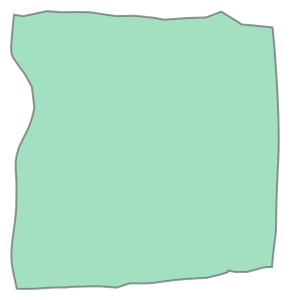

In [28]:
shape.geometry[100]

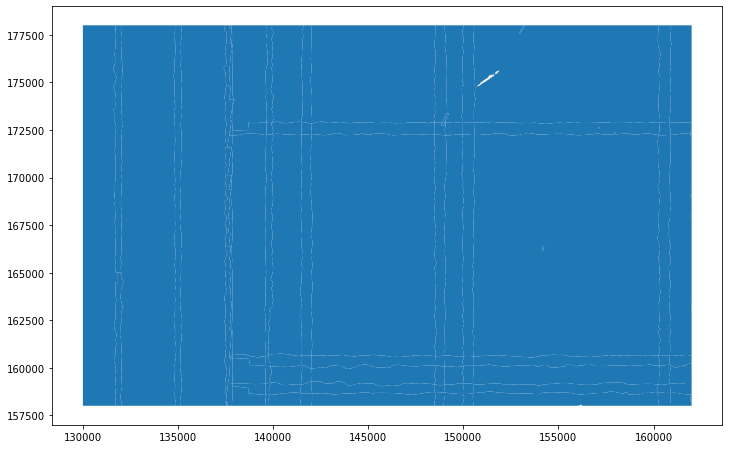

In [97]:
fig, ax = plt.subplots(figsize=(12, 12))
shape.plot(ax=ax)
plt.show()

In [181]:
shape.geometry[50].bounds

(139601.13012694946, 159173.6139149427, 139932.09008789397, 160095.5165061516)

In [111]:
shape.geometry[51].bounds

(139598.04010009568, 157999.99999606475, 139802.21008301093, 158620.80010985932)

In [5]:
import fiona
import rasterio.mask

from pathlib import Path
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [10]:
with fiona.open(
    "Data/DHMVIIDSMRAS1m_k01/DHMVII_vdc_k01/DHMVII_vdc_k01.shp", "r"
) as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open("Data/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif") as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta
    out_meta.update(
        {
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform,
        }
    )

    fig = go.Figure(data=[go.Surface(z=out_image)])
    fig.show()

TypeError: can't multiply sequence by non-int of type 'Affine'

In [37]:
def plot_shape_and_tiff(x=149308, y=170640):
    paths = Path("Data/").glob("**/*.shp")
    for path in paths:
        with fiona.open(path) as shapefile:
            if shapefile.bounds[0] <= x <= shapefile.bounds[2]:
                if shapefile.bounds[1] <= y <= shapefile.bounds[3]:
                    shape = [feature["geometry"] for feature in shapefile]
                    return shape


def find_plot_shape(x=149308, y=170640):
    paths = Path("Data/").glob("**/*.shp")
    for path in paths:
        with fiona.open(path) as shapefile:
            if shapefile.bounds[0] <= x <= shapefile.bounds[2]:
                if shapefile.bounds[1] <= y <= shapefile.bounds[3]:
                    shapes = [feature["geometry"] for feature in shapefile]
    paths = Path("Data/").glob("**/*.tif")
    for path in paths:
        with rasterio.open(path) as fd:
            if fd.bounds.left <= x <= fd.bounds.right:
                if fd.bounds.bottom <= y <= fd.bounds.top:
                    out_image, out_transform = rasterio.mask.mask(fd, shapes, crop=True)
                    out_meta = fd.meta.copy()
                    out_meta.update(
                        {
                            "driver": "GTiff",
                            "height": out_image.shape[1],
                            "width": out_image.shape[2],
                            "transform": out_transform,
                        }
                    )
    # print("out_image", out_image)
    # print("out_transform", out_transform)
    # print("out_meta", out_meta)
    fig = go.Figure(data=[go.Surface(z=out_image)])
    fig.show()


### This doesn't work ###

# def plot_building(x=149308, y=170640):
#    global BBOX
#    paths = Path("./Data").glob("**/*.tif")
#    x_axis = int(BBOX[2]) - int(BBOX[0])
#    y_axis = int(BBOX[3]) - int(BBOX[1])
#    loc = np.zeros((y_axis, x_axis))
#    for path in paths:
#        with rasterio.open(path) as fd:
#            if fd.bounds.left <= x <= fd.bounds.right:
#                if fd.bounds.bottom <= y <= fd.bounds.top:
#                    print(f"File source is {path}")
#                    left, bottom, right, top = (
#                        x - x_axis / 2,
#                        y - y_axis / 2,
#                        x + x_axis / 2,
#                        y + y_axis / 2,
#                    )
#                    crop = fd.read(
#                        1,
#                        window=rasterio.windows.from_bounds(
#                            left, bottom, right, top, fd.transform
#                        ),
#                    )
#                    loc += crop
#    fig = go.Figure(data=[go.Surface(z=loc)])
#    fig.show()

In [38]:
plot_shape_and_tiff()

[{'type': 'MultiPolygon',
  'coordinates': [[[(139515.92987060745, 177999.9901123044),
     (139524.68011474563, 177999.9901123044),
     (139528.59008789147, 177999.9901123044),
     (139523.34832763716, 177999.9880981413),
     (139515.92987060745, 177999.9901123044)]],
   [[(138909.13391123692, 177999.98913047856),
     (138890.120483401, 177999.98449707078),
     (138874.92010467578, 177999.98902532837),
     (138875.23010253513, 177999.9901123044),
     (138876.20007324283, 177999.9901123044),
     (138876.35009765846, 177999.9901123044),
     (138879.48010253775, 177999.9901123044),
     (138879.7501220676, 177999.9901123044),
     (138879.90008544558, 177999.9901123044),
     (138882.92010498044, 177999.9901123044),
     (138887.86010742074, 177999.9901123044),
     (138891.13012695388, 177999.9901123044),
     (138892.88012694978, 177999.9896850567),
     (138893.49011230675, 177999.9895019517),
     (138899.00988769764, 177999.9901123044),
     (138901.200073246, 177999.990112

In [25]:
type(plg)

shapely.geometry.polygon.Polygon

---

## Tkinter

In [133]:
from platform import python_version

print(python_version())

3.9.7


In [3]:
from tkinter import *
from tkinter import ttk

In [9]:
btn = Button()
print(btn.configure().keys())

dict_keys(['activebackground', 'activeforeground', 'anchor', 'background', 'bd', 'bg', 'bitmap', 'borderwidth', 'command', 'compound', 'cursor', 'default', 'disabledforeground', 'fg', 'font', 'foreground', 'height', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'image', 'justify', 'overrelief', 'padx', 'pady', 'relief', 'repeatdelay', 'repeatinterval', 'state', 'takefocus', 'text', 'textvariable', 'underline', 'width', 'wraplength'])


In [10]:
ent = Entry()
print(ent.configure().keys())

dict_keys(['background', 'bd', 'bg', 'borderwidth', 'cursor', 'disabledbackground', 'disabledforeground', 'exportselection', 'fg', 'font', 'foreground', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'insertbackground', 'insertborderwidth', 'insertofftime', 'insertontime', 'insertwidth', 'invalidcommand', 'invcmd', 'justify', 'readonlybackground', 'relief', 'selectbackground', 'selectborderwidth', 'selectforeground', 'show', 'state', 'takefocus', 'textvariable', 'validate', 'validatecommand', 'vcmd', 'width', 'xscrollcommand'])


In [11]:
frm = ttk.Frame()
print(frm.configure().keys())

dict_keys(['borderwidth', 'padding', 'relief', 'width', 'height', 'takefocus', 'cursor', 'style', 'class'])


In [12]:
lbl = Label()
print(lbl.configure().keys())

dict_keys(['activebackground', 'activeforeground', 'anchor', 'background', 'bd', 'bg', 'bitmap', 'borderwidth', 'compound', 'cursor', 'disabledforeground', 'fg', 'font', 'foreground', 'height', 'highlightbackground', 'highlightcolor', 'highlightthickness', 'image', 'justify', 'padx', 'pady', 'relief', 'state', 'takefocus', 'text', 'textvariable', 'underline', 'width', 'wraplength'])
